One of the key features of Pandas is its ability to work with time series data and in particular recognize dates and time. The functionality is truely remarkable. Here is the documentation and another notebook developed for the course. 

-  https://pandas.pydata.org/pandas-docs/stable/timeseries.html

-  https://github.com/mwaugh0328/Data_Bootcamp_Fall_2017/blob/master/data_bootcamp_1211/bootcamp_timeseries.ipynb

The notebook below provides just a small snapshot of what is possible. But it focuses on one aspect that there is much interest within the class, i.e. "event" like studies of financial data. The application below will focus on how apple's stock behaved before and after new Iphone product annaoucment. 

In [74]:
import pandas as pd # we know this
import quandl # I'll get the stock price data from here
import matplotlib.pyplot as plt # we know this

from pandas.tseries.holiday import USFederalHolidayCalendar # this allows us to create special calanders
from pandas.tseries.offsets import CustomBusinessDay

The first step is to get the days and events that we care about. We hand coded the events and then created a series that contains the product annoucement and then the associated date.

In [93]:
announcement_dates = pd.Series(
    [
        "First iPhone", "3G"
    ], # This creates the model...
    
    index=pd.to_datetime([
        "Jan. 9, 2007", "Jun. 9, 2008" # Then this creates the index, not the 
                                       # to_datetime command
    ]),
    
    name="Model"
)
announcement_dates

2007-01-09    First iPhone
2008-06-09              3G
Name: Model, dtype: object

Then lets grab the stock price data. Here you could imagine two approaches: One option is to grab all the stock price data and then select only the relavent dates. Another is to grab only the relvent dates. I think the latter is easier, but it could go either way. HEre I grab the data.

In [94]:
key = "VQ9pfbdfDxTMbF6jdHm6"

aapl = quandl.get("WIKI/AAPL", start_date="2006-12-25", api_key = key)
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-12-26,82.15,82.57,80.89,81.51,17524600.0,0.0,1.0,10.557420,10.611396,10.395492,10.475171,122672200.0
2006-12-27,78.15,82.00,76.77,81.52,69134100.0,0.0,1.0,10.043364,10.538143,9.866015,10.476456,483938700.0
2006-12-28,80.22,81.25,79.65,80.87,39995600.0,0.0,1.0,10.309388,10.441757,10.236135,10.392922,279969200.0
2006-12-29,83.95,85.40,83.36,84.84,38443900.0,0.0,1.0,10.788745,10.975090,10.712922,10.903122,269107300.0
2007-01-03,86.29,86.58,81.90,83.80,44225700.0,0.0,1.0,11.089468,11.126737,10.525291,10.769468,309579900.0


Then lets quickly plot the data to see what is going on with Apple's stock...

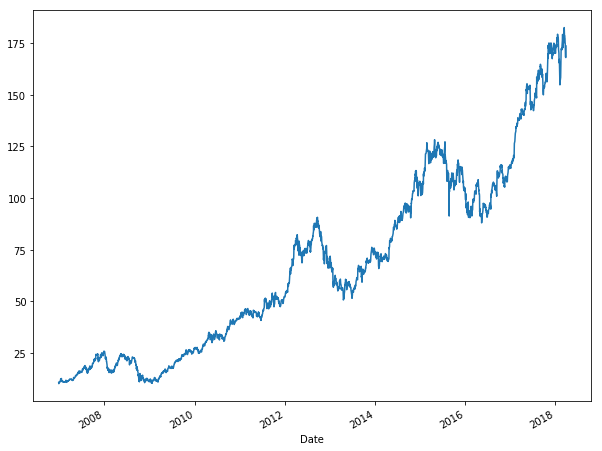

In [95]:
fig, ax  = plt.subplots(figsize = (10,8))

aapl["Adj. Open"].plot(ax = ax)

plt.show()

Ok, so here is what we want to do:
 - For each date in our annoucement we want to grab the three days before. And then the three days after.
 - One issue is that these annoucements may be on, say, Thursday's so the three days after may include a saturday. Another issue could be holidays as well. So we need to be consious about this issue. This is where the pandas date time functionality help a lot.

In [78]:
bday_us = CustomBusinessDay(calendar=USFederalHolidayCalendar())
# This creates a "time step" object that will push forworad or backward skiping holidays and weekends. 

# https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-custombusinessdays 
# This is cool, it shows how 

# Then this creates a function that will generate the neigboring dates.

def neighbor_dates(date, nbefore=3, nafter=3):
    # Make sure the date is a datetime
    date = pd.to_datetime(date)

    # Create a list of business days
    before_and_after = [date + i*bday_us for i in range(-nbefore, nafter+1)]

    return before_and_after


test = neighbor_dates("03/28/2018")

---
Below, I play around with snipits of the this code to see how the bday_us time step works

In [79]:
pd.to_datetime("03/28/2018") + -3*bday_us

Timestamp('2018-03-23 00:00:00')

In [82]:
dates = []

for ann_date in announcement_dates.index:
    
    dates.extend(neighbor_dates(ann_date))

dates = pd.Series(dates)

In [83]:
dates

0    2006-12-22
1    2006-12-26
2    2006-12-27
3    2006-12-28
4    2006-12-29
5    2007-01-02
6    2007-01-03
7    2007-01-04
8    2007-01-05
9    2007-01-08
10   2007-01-09
11   2007-01-10
12   2007-01-11
13   2007-01-12
14   2007-01-16
15   2007-01-17
16   2007-01-18
17   2007-01-19
18   2007-01-22
19   2007-01-23
20   2007-01-24
21   2008-05-23
22   2008-05-27
23   2008-05-28
24   2008-05-29
25   2008-05-30
26   2008-06-02
27   2008-06-03
28   2008-06-04
29   2008-06-05
30   2008-06-06
31   2008-06-09
32   2008-06-10
33   2008-06-11
34   2008-06-12
35   2008-06-13
36   2008-06-16
37   2008-06-17
38   2008-06-18
39   2008-06-19
40   2008-06-20
41   2008-06-23
dtype: datetime64[ns]

In [84]:
aapl.index

DatetimeIndex(['2006-12-26', '2006-12-27', '2006-12-28', '2006-12-29',
               '2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=2830, freq=None)

In [85]:
prices = aapl.loc[dates]
prices

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-26,82.15,82.57,80.8900,81.51,17524600.0,0.0,1.0,10.557420,10.611396,10.395492,10.475171,122672200.0
2006-12-27,78.15,82.00,76.7700,81.52,69134100.0,0.0,1.0,10.043364,10.538143,9.866015,10.476456,483938700.0
2006-12-28,80.22,81.25,79.6500,80.87,39995600.0,0.0,1.0,10.309388,10.441757,10.236135,10.392922,279969200.0
2006-12-29,83.95,85.40,83.3600,84.84,38443900.0,0.0,1.0,10.788745,10.975090,10.712922,10.903122,269107300.0
2007-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,86.29,86.58,81.9000,83.80,44225700.0,0.0,1.0,11.089468,11.126737,10.525291,10.769468,309579900.0
2007-01-04,84.05,85.95,83.8200,85.66,30259300.0,0.0,1.0,10.801596,11.045773,10.772038,11.008504,211815100.0
2007-01-05,85.77,86.20,84.4000,85.05,29812200.0,0.0,1.0,11.022640,11.077901,10.846576,10.930110,208685400.0


In [86]:

prices = prices.join(announcement_dates)

In [87]:
prices.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Model
Date,,,,,,,,,,,,,
2006-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-26,82.15,82.57,80.89,81.51,17524600.0,0.0,1.0,10.557420,10.611396,10.395492,10.475171,122672200.0,NaN
2006-12-27,78.15,82.00,76.77,81.52,69134100.0,0.0,1.0,10.043364,10.538143,9.866015,10.476456,483938700.0,NaN
2006-12-28,80.22,81.25,79.65,80.87,39995600.0,0.0,1.0,10.309388,10.441757,10.236135,10.392922,279969200.0,NaN
2006-12-29,83.95,85.40,83.36,84.84,38443900.0,0.0,1.0,10.788745,10.975090,10.712922,10.903122,269107300.0,NaN


In [88]:
prices = prices.ffill(limit=3)
prices = prices.bfill(limit=3)

In [89]:
prices

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Model
Date,,,,,,,,,,,,,
2006-12-22,82.15,82.57,80.8900,81.51,17524600.0,0.0,1.0,10.557420,10.611396,10.395492,10.475171,122672200.0,First iPhone
2006-12-26,82.15,82.57,80.8900,81.51,17524600.0,0.0,1.0,10.557420,10.611396,10.395492,10.475171,122672200.0,First iPhone
2006-12-27,78.15,82.00,76.7700,81.52,69134100.0,0.0,1.0,10.043364,10.538143,9.866015,10.476456,483938700.0,First iPhone
2006-12-28,80.22,81.25,79.6500,80.87,39995600.0,0.0,1.0,10.309388,10.441757,10.236135,10.392922,279969200.0,First iPhone
2006-12-29,83.95,85.40,83.3600,84.84,38443900.0,0.0,1.0,10.788745,10.975090,10.712922,10.903122,269107300.0,First iPhone
2007-01-02,83.95,85.40,83.3600,84.84,38443900.0,0.0,1.0,10.788745,10.975090,10.712922,10.903122,269107300.0,First iPhone
2007-01-03,86.29,86.58,81.9000,83.80,44225700.0,0.0,1.0,11.089468,11.126737,10.525291,10.769468,309579900.0,First iPhone
2007-01-04,84.05,85.95,83.8200,85.66,30259300.0,0.0,1.0,10.801596,11.045773,10.772038,11.008504,211815100.0,First iPhone
2007-01-05,85.77,86.20,84.4000,85.05,29812200.0,0.0,1.0,11.022640,11.077901,10.846576,10.930110,208685400.0,First iPhone


In [90]:
def scale_by_middle(df):
    # How many rows
    N = df.shape[0]

    # Divide by middle row and scale to 100
    # Note: N // 2 is modulus division meaning that it is
    #       rounded to nearest whole number)
    out = (df["Open"] / df.iloc[N // 2]["Open"]) * 100
    
    # We don't want to keep actual dates, but rather the number
    # of days before or after the announcment. Let's set that 
    # as the index
    out.index = list(range(-(N//2), N//2+1))
    
    # also change the name of this series
    out.name = "DeltaDays"
    return out

In [91]:
to_plot = prices.groupby("Model").apply(scale_by_middle).T

to_plot = to_plot[announcement_dates.values]
to_plot

Model,First iPhone,3G
DeltaDays,,
-10,95.026027,97.744971
-9,95.026027,98.853558
-8,90.399075,101.389790
-7,92.793522,101.086957
-6,97.108155,101.395198
-5,97.108155,101.935972
-4,99.814922,101.070733
-3,97.223829,99.502488
-2,99.213418,100.719230


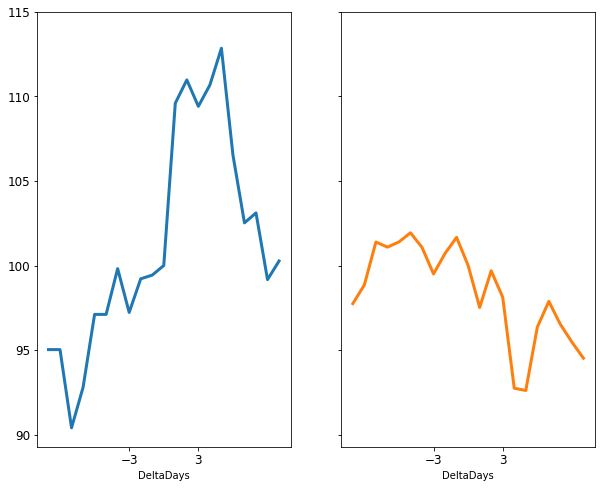

In [92]:
yticks = [90, 95, 100, 105, 110, 115]

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 8))

to_plot.plot(
    ax=axs, subplots=True, legend=False, 
    yticks=yticks, xticks=[-3, 3],  linewidth=3, fontsize=12)

plt.show()